In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc


file_path = 'data_processing2_updated3_new.csv'
df = pd.read_csv(file_path)


print("CSV文件中的列名：")
print(df.columns)


df_cleaned = df.dropna(subset=['Average Mark var'])


print("检查是否存在NaN值：")
print(df_cleaned.isna().sum())

print("检查是否存在无穷大值：")
print(df_cleaned.applymap(lambda x: x == float('inf')).sum())


df_cleaned = df_cleaned.dropna()


df_cleaned = df_cleaned[~df_cleaned.isin([float('inf'), float('-inf')]).any(1)]

CSV文件中的列名：
Index(['Year', 'Average Age mean', 'Average Net Result mean',
       'Average Mark var', 'current_match_ranking mean',
       'current_match_ranking min', 'Average Mark min', 'Nation mean',
       'Athlete', 'Years to Olympics', 'Finalist_Weight'],
      dtype='object')
检查是否存在NaN值：
Year                          0
Average Age mean              0
Average Net Result mean       0
Average Mark var              0
current_match_ranking mean    0
current_match_ranking min     0
Average Mark min              0
Nation mean                   0
Athlete                       0
Years to Olympics             0
Finalist_Weight               0
dtype: int64
检查是否存在无穷大值：
Year                          0
Average Age mean              0
Average Net Result mean       0
Average Mark var              0
current_match_ranking mean    0
current_match_ranking min     0
Average Mark min              0
Nation mean                   0
Athlete                       0
Years to Olympics             0
Finalist_

C:\Users\86133\AppData\Local\Temp\ipykernel_4696\3871413331.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_cleaned = df_cleaned[~df_cleaned.isin([float('inf'), float('-inf')]).any(1)]


In [61]:


columns_to_analyze = [
    'Average Age mean', 
    'Average Net Result mean', 
    'Average Mark var', 
    'current_match_ranking mean', 
    'current_match_ranking min', 
    'Average Mark min', 
    'Nation mean',
    'Years to Olympics',
    'Finalist_Weight'
]




X = df_cleaned[columns_to_analyze[:-1]]  
X = sm.add_constant(X)


y = df_cleaned['Finalist_Weight']


logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())


y_pred_prob = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.512055
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Finalist_Weight   No. Observations:                  664
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                            8
Date:                Thu, 11 Jul 2024   Pseudo R-squ.:                 0.08398
Time:                        14:05:20   Log-Likelihood:                -340.00
converged:                       True   LL-Null:                       -371.18
Covariance Type:            nonrobust   LLR p-value:                 1.612e-10
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         24.2024     19.212      1.260      0.208     -

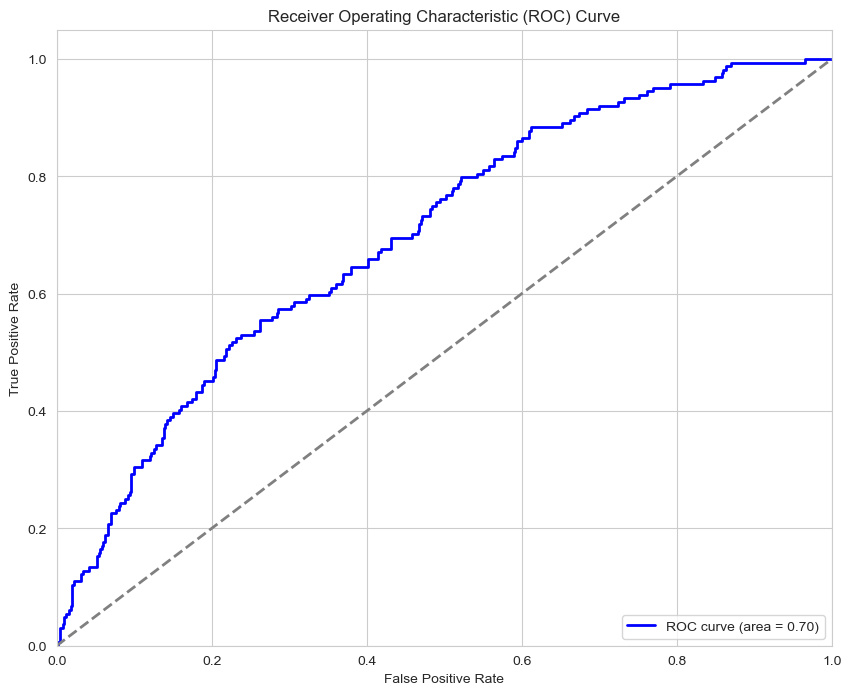

In [62]:

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True) 
plt.show()

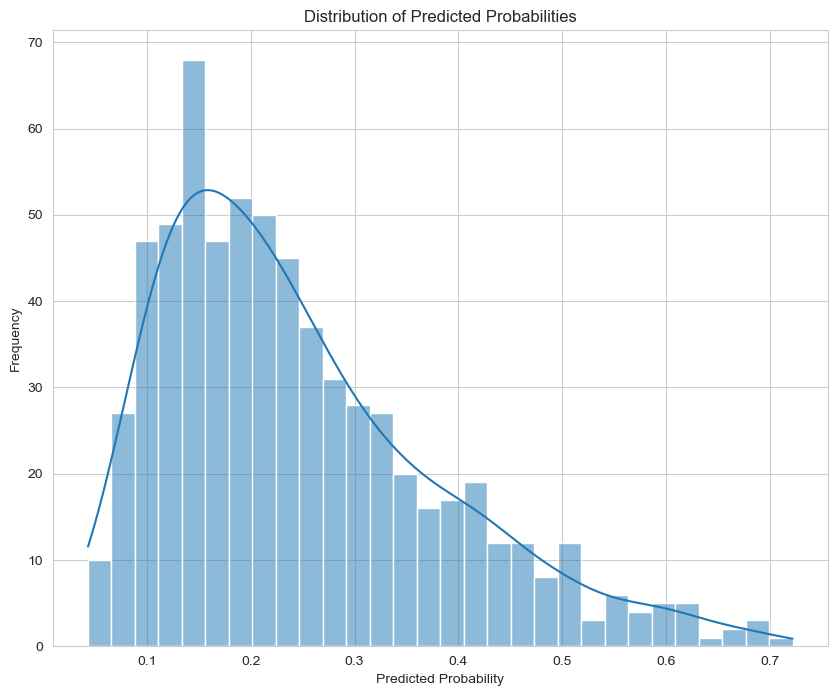

In [63]:

# 绘制预测值分布图
plt.figure(figsize=(10, 8))
sns.histplot(y_pred_prob, bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

# 计算混淆矩阵
y_pred = (y_pred_prob > 0.5).astype(int)  # 将预测概率转换为类别
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# 打印分类报告
cr = classification_report(y, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[481  19]
 [143  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       500
           1       0.53      0.13      0.21       164

    accuracy                           0.76       664
   macro avg       0.65      0.55      0.53       664
weighted avg       0.71      0.76      0.70       664



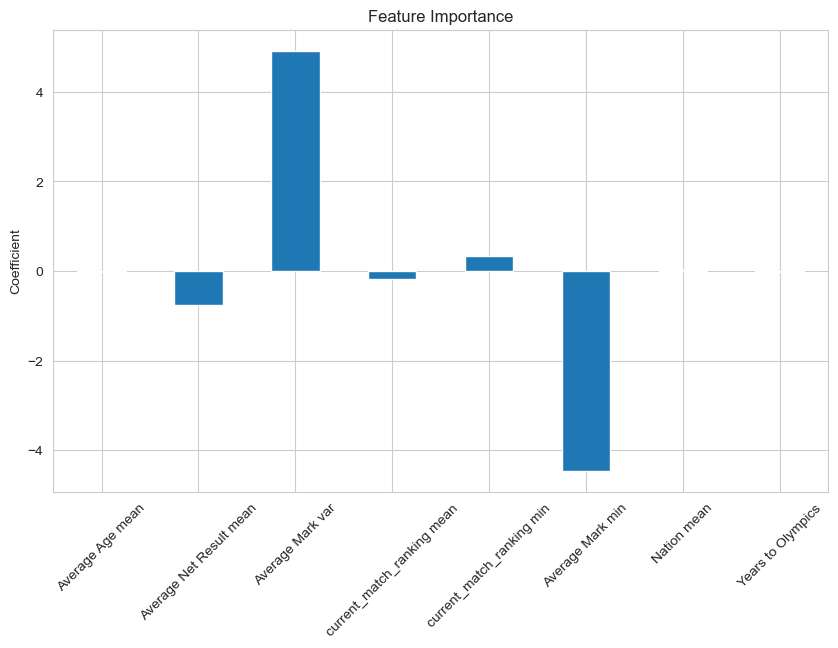

In [58]:
# 获取模型的系数
coef = result.params.drop('const')

# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

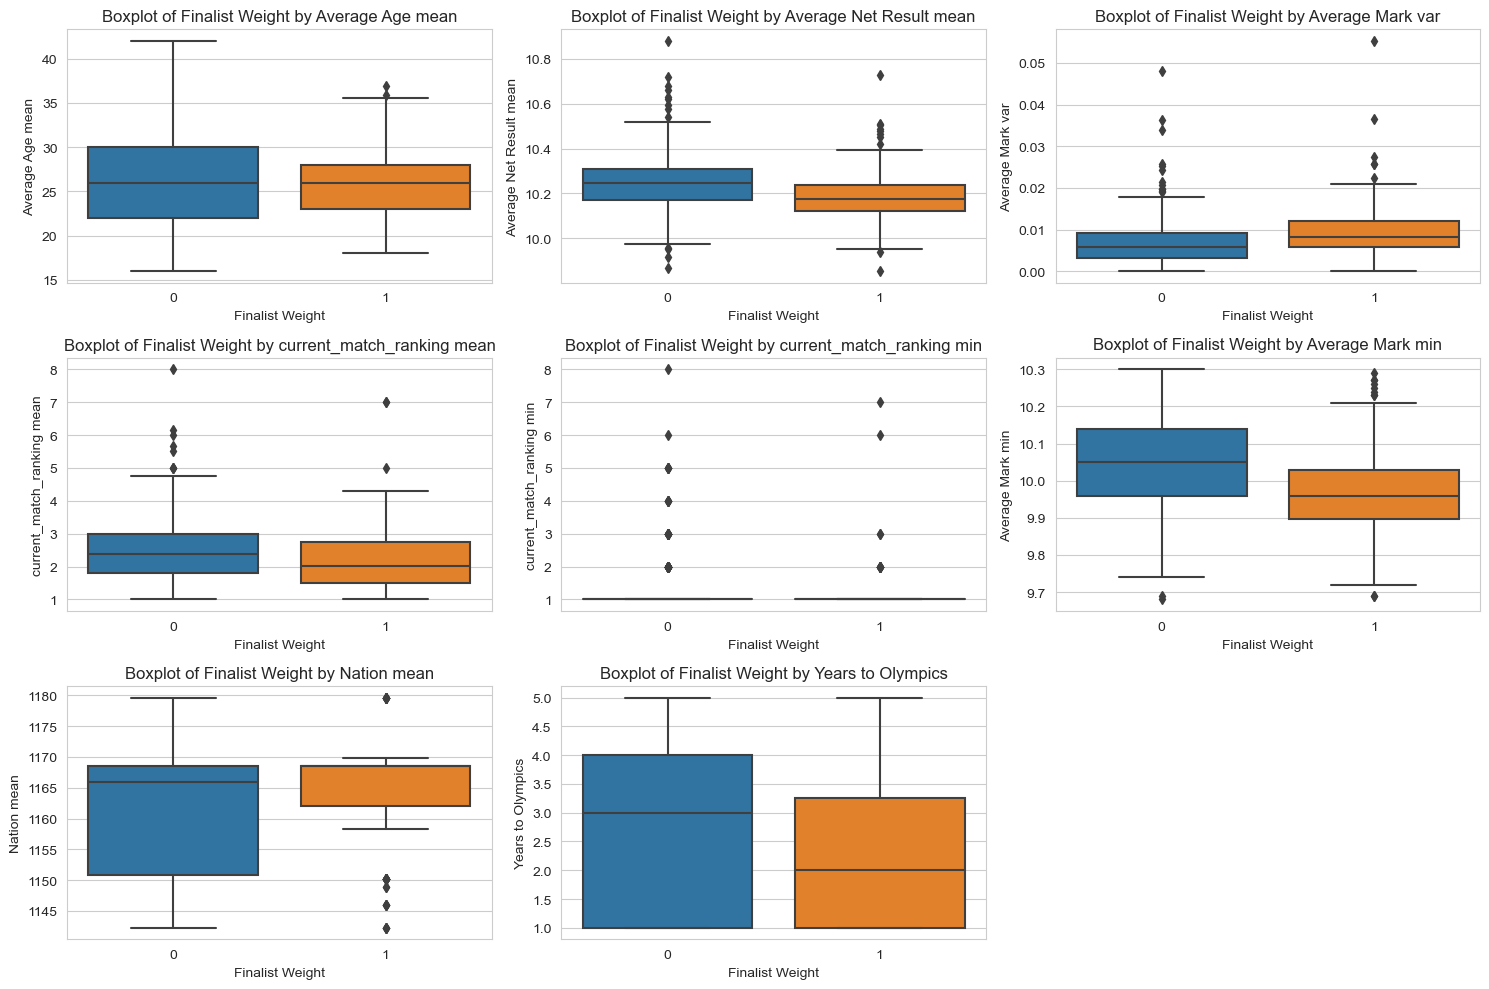

In [59]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Finalist_Weight', y=column, data=df_cleaned)
    plt.title(f'Boxplot of Finalist Weight by {column}')
    plt.xlabel('Finalist Weight')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

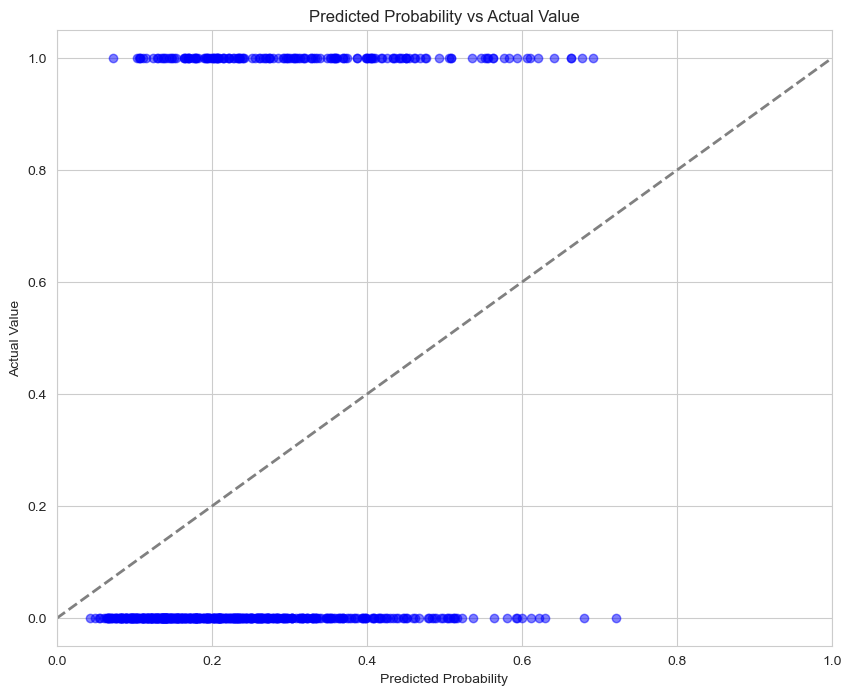

In [64]:
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_prob, y, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Value')
plt.title('Predicted Probability vs Actual Value')
plt.grid(True)
plt.show()